In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import PIL
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import ReduceLROnPlateau
from keras.utils import to_categorical
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data_dir_train = pathlib.Path("/content/drive/MyDrive/Upgrad Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")
data_dir_test = pathlib.Path('/content/drive/MyDrive/Upgrad Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

118
2239


In [6]:
# Lets load using Keras

In [7]:
batch_size = 32
img_height = 180
img_width = 180

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 118 files belonging to 9 classes.
Using 95 files for training.


In [9]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [10]:
# Avbove is the list of all classes of skin cancer

In [11]:
# Validation data set

In [12]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.
Using 23 files for validation.


In [13]:
# Visualize the data

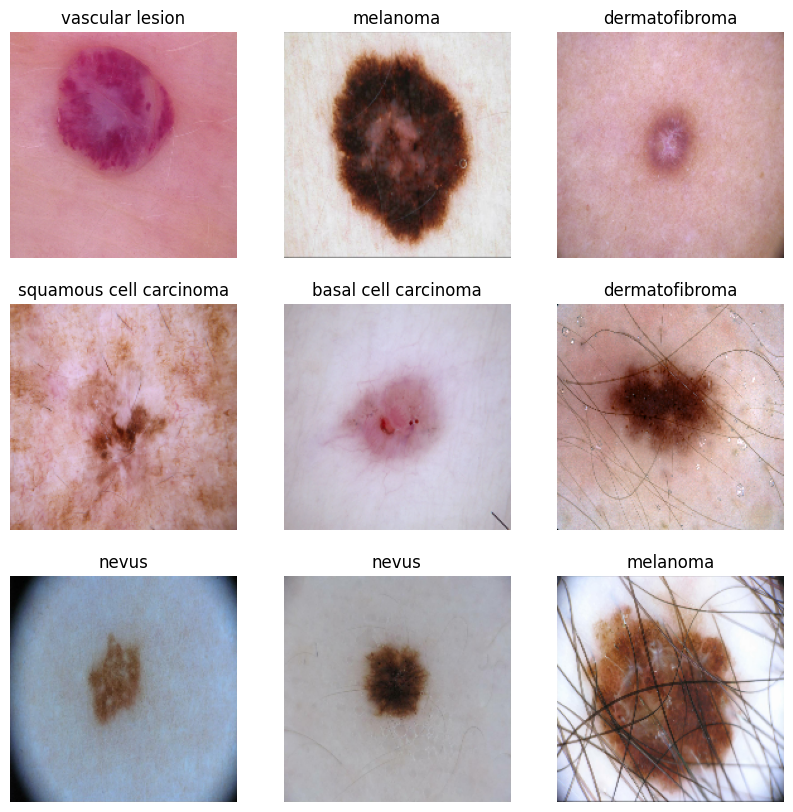

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
# Lets Create the model

In [17]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                   

In [19]:
# Lets Train the model

In [20]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3/3 [==============================] - 35s 14s/step - loss: 2.2131 - accuracy: 0.1263 - val_loss: 2.2382 - val_accuracy: 0.0435
Epoch 2/30
3/3 [==============================] - 15s 5s/step - loss: 2.1577 - accuracy: 0.1474 - val_loss: 2.3929 - val_accuracy: 0.0000e+00
Epoch 3/30
3/3 [==============================] - 15s 5s/step - loss: 2.0540 - accuracy: 0.1895 - val_loss: 2.2679 - val_accuracy: 0.0000e+00
Epoch 4/30
3/3 [==============================] - 15s 5s/step - loss: 2.0659 - accuracy: 0.1474 - val_loss: 2.3669 - val_accuracy: 0.0000e+00
Epoch 5/30
3/3 [==============================] - 15s 5s/step - loss: 2.0199 - accuracy: 0.1789 - val_loss: 2.4316 - val_accuracy: 0.0435
Epoch 6/30
3/3 [==============================] - 15s 5s/step - loss: 1.9567 - accuracy: 0.2000 - val_loss: 2.5061 - val_accuracy: 0.0870
Epoch 7/30
3/3 [==============================] - 15s 5s/step - loss: 1.9224 - accuracy: 0.2105 - val_loss: 2.7505 - val_accuracy: 0.0435
Epoch 8/30
3/3 [================

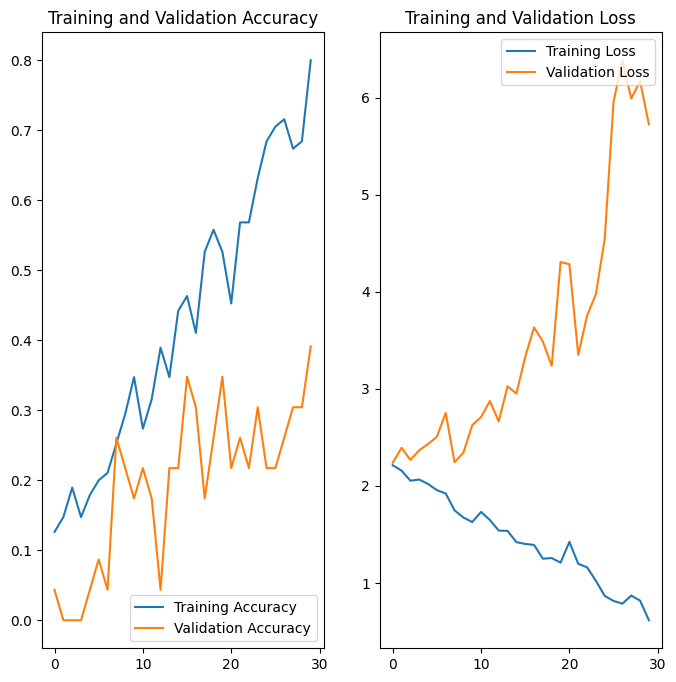

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

1/1 [==============================] - 1s 1s/step - loss: 5.7242 - accuracy: 0.3913
Accuracy:  0.7684210538864136
Validation Accuracy:  0.3913043439388275
Loss:  0.6084772348403931
Validation Loss 5.724221706390381


In [23]:
# hence model is overfitting

In [24]:
path_list=[]
lesion_list=[]
for i in class_names:

    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/Upgrad Assignment/CNN_a...,actinic keratosis
1,/content/drive/MyDrive/Upgrad Assignment/CNN_a...,actinic keratosis
2,/content/drive/MyDrive/Upgrad Assignment/CNN_a...,actinic keratosis
3,/content/drive/MyDrive/Upgrad Assignment/CNN_a...,actinic keratosis
4,/content/drive/MyDrive/Upgrad Assignment/CNN_a...,actinic keratosis
...,...,...
113,/content/drive/MyDrive/Upgrad Assignment/CNN_a...,squamous cell carcinoma
114,/content/drive/MyDrive/Upgrad Assignment/CNN_a...,squamous cell carcinoma
115,/content/drive/MyDrive/Upgrad Assignment/CNN_a...,vascular lesion
116,/content/drive/MyDrive/Upgrad Assignment/CNN_a...,vascular lesion


In [25]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/Upgrad Assignment/CNN_a...,actinic keratosis
1,/content/drive/MyDrive/Upgrad Assignment/CNN_a...,actinic keratosis
2,/content/drive/MyDrive/Upgrad Assignment/CNN_a...,actinic keratosis
3,/content/drive/MyDrive/Upgrad Assignment/CNN_a...,actinic keratosis
4,/content/drive/MyDrive/Upgrad Assignment/CNN_a...,actinic keratosis
...,...,...
113,/content/drive/MyDrive/Upgrad Assignment/CNN_a...,squamous cell carcinoma
114,/content/drive/MyDrive/Upgrad Assignment/CNN_a...,squamous cell carcinoma
115,/content/drive/MyDrive/Upgrad Assignment/CNN_a...,vascular lesion
116,/content/drive/MyDrive/Upgrad Assignment/CNN_a...,vascular lesion


<BarContainer object of 9 artists>

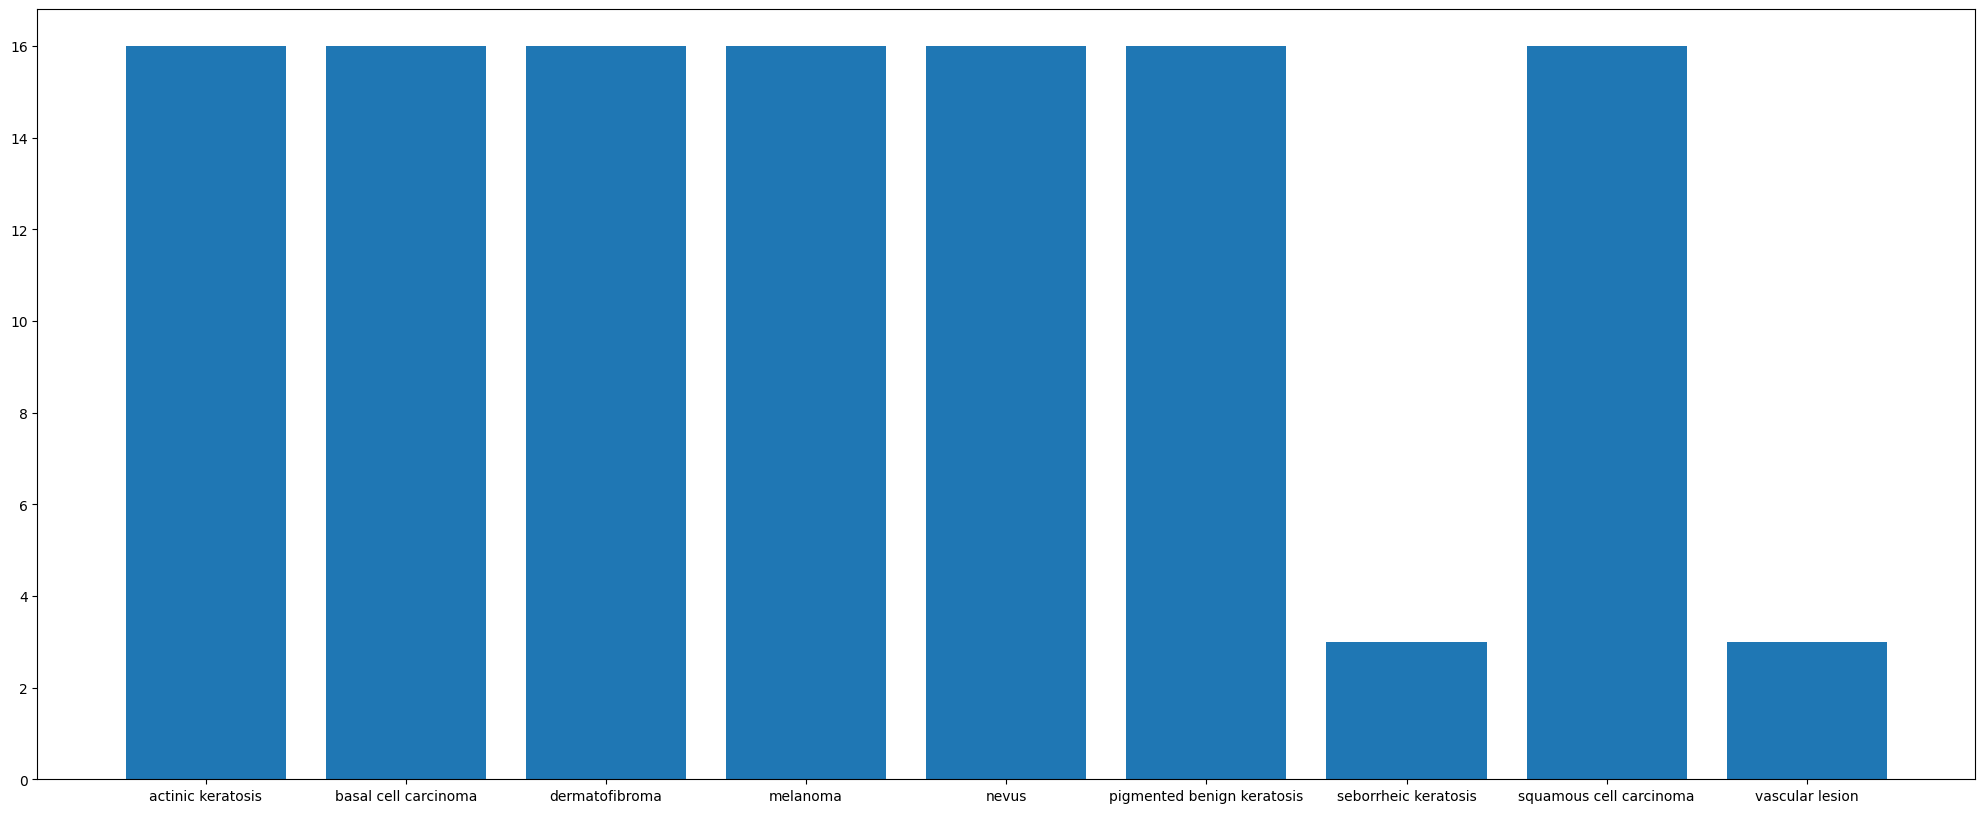

In [26]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

In [27]:
!pip install Augmentor



In [29]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("/content/drive/MyDrive/Upgrad Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7ABE617B74F0>: 100%|██████████| 500/500 [00:29<00:00, 17.17 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7ABE605CFF70>: 100%|██████████| 500/500 [00:33<00:00, 15.01 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7ABE59A5BDC0>: 100%|██████████| 500/500 [00:28<00:00, 17.82 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7ABE604833A0>: 100%|██████████| 500/500 [00:27<00:00, 17.90 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7ABE59F5CC40>: 100%|██████████| 500/500 [00:30<00:00, 16.15 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7ABE59E891E0>: 100%|██████████| 500/500 [00:26<00:00, 18.99 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7ABE60527E20>: 100%|██████████| 500/500 [00:32<00:00, 15.25 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7ABE6023B640>: 100%|██████████| 500/500 [00:29<00:00, 16.85 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7ABE59BDA380>: 100%|██████████| 500/500 [00:30<00:00, 16.16 Samples/s]


In [30]:
data_dir_train1 = pathlib.Path("/content/drive/MyDrive/Upgrad Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [31]:
for i in class_names:

    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/drive/MyDrive/Upgrad Assignment/CNN_a...,actinic keratosis
1,/content/drive/MyDrive/Upgrad Assignment/CNN_a...,actinic keratosis
2,/content/drive/MyDrive/Upgrad Assignment/CNN_a...,actinic keratosis
3,/content/drive/MyDrive/Upgrad Assignment/CNN_a...,actinic keratosis
4,/content/drive/MyDrive/Upgrad Assignment/CNN_a...,actinic keratosis
...,...,...
4613,/content/drive/MyDrive/Upgrad Assignment/CNN_a...,vascular lesion
4614,/content/drive/MyDrive/Upgrad Assignment/CNN_a...,vascular lesion
4615,/content/drive/MyDrive/Upgrad Assignment/CNN_a...,vascular lesion
4616,/content/drive/MyDrive/Upgrad Assignment/CNN_a...,vascular lesion


In [32]:
new_df['Label'].value_counts()

pigmented benign keratosis    908
melanoma                      863
basal cell carcinoma          797
nevus                         767
squamous cell carcinoma       385
vascular lesion               270
actinic keratosis             269
dermatofibroma                197
seborrheic keratosis          162
Name: Label, dtype: int64

In [33]:
batch_size = 32
img_height = 180
img_width = 180

In [34]:
import pathlib

data_dir_train1=pathlib.Path("/content/drive/MyDrive/Upgrad Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

In [35]:
data_dir_train1

PosixPath('/content/drive/MyDrive/Upgrad Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [36]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

2239


In [37]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


data_dir_train1=pathlib.Path("/content/drive/MyDrive/Upgrad Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 5392 files for training.


In [38]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 1347 files for validation.


In [55]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))

])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [56]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [57]:


# epochs =40

# # history = model.fit(
# #   train_ds,
# #   validation_data=val_ds,
# #   epochs=epochs
# # )


In [70]:
# !pip install tensorflow
# import tensorflow as tf

# Create the model.
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

# Compile the model.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model.
# model.fit(X_train, y_train, epochs=40)

# history = model.fit(train_ds, validation_data=val_ds, epochs=40)
history = model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Get the training history.
history = model.history



In [71]:
# # Plot the training history.
# acc = history.history(['accuracy'])
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(epochs)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

acc = history.history(['accuracy'])
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

AttributeError: ignored

In [44]:
# Accuracy is increased after using augmentor
# MOdel is still overfitting